Matrix shape: (100, 50176)
Saved matrix to dataset/processed/p_kambi/k_final.npy
Preview Image 1


C:\Users\avant\AppData\Local\Temp\ipykernel_7672\4271806670.py:41: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(img_matrix.astype(np.uint8), mode='L')


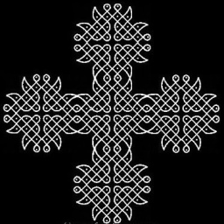

Preview Image 2


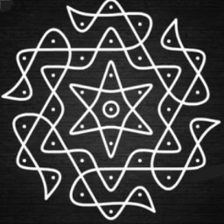

Preview Image 3


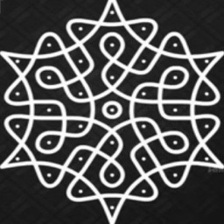

Preview Image 4


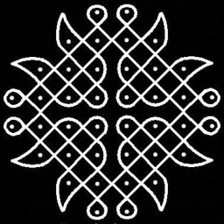

Preview Image 5


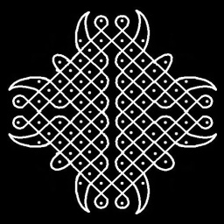

In [28]:
from PIL import Image
import numpy as np
import os
from IPython.display import display

# --- CONFIG ---
folder_path = r"dataset/processed/p_kambi/im_k"      # <-- change to your images folder
save_path   = r"dataset/processed/p_kambi/k_final.npy"   # <-- where to save the matrix
size        = (224, 224)                # <<< 224 × 224 target size
grayscale   = True                      # False for RGB

# --- Step 1: Read and flatten images ---
flat_images = []

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path)
            img = img.convert('L' if grayscale else 'RGB')
            img = img.resize(size)
            flat_images.append(np.array(img).flatten())
        except Exception as e:
            print(f"Skipping {filename}: {e}")

if not flat_images:
    raise ValueError("No valid images found!")

# --- Step 2: Stack and save ---
image_matrix = np.stack(flat_images, axis=0)
print("Matrix shape:", image_matrix.shape)

# Save the matrix for later use
np.save(save_path, image_matrix)
print(f"Saved matrix to {save_path}")

# --- Step 3: Optional preview of a few images ---
for i, flat_row in enumerate(image_matrix[:5]):  # show first 5
    if grayscale:
        img_matrix = flat_row.reshape(size)
        img = Image.fromarray(img_matrix.astype(np.uint8), mode='L')
    else:
        img_matrix = flat_row.reshape((size[1], size[0], 3))
        img = Image.fromarray(img_matrix.astype(np.uint8), mode='RGB')
    print(f"Preview Image {i+1}")
    display(img)


In [32]:
import numpy as np

# --- CONFIG ---
file_path = r"dataset/processed/p_kambi/k_final.npy"   # path to your saved .npy

# --- Load the matrix ---
image_matrix = np.load(file_path)
print("Matrix shape:", image_matrix.shape)   # e.g., (num_images, 224*224)

# --- View the matrix values ---
# Print the entire array (may be large!)
print(image_matrix)

# --- OR view a small portion for readability ---
# First 2 rows, first 20 columns as a sample:
print("\nSample slice (first 2 rows, first 20 columns):")
print(image_matrix[:2, :20])


Matrix shape: (100, 50176)
[[  0   0   0 ...   0   0   0]
 [ 61  55  60 ...  13  13  13]
 [ 61  51  49 ...  23  22  22]
 ...
 [255 255 255 ... 255 255 255]
 [ 47  51  55 ...  89  83  78]
 [255 255 255 ... 255 255 255]]

Sample slice (first 2 rows, first 20 columns):
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [61 55 60 53 52 53 53 52 53 51 41 28 24 16 15 17 14 13 16 15]]


Matrix shape: (100, 50176)
Displaying row 29


C:\Users\avant\AppData\Local\Temp\ipykernel_7672\1272505301.py:24: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(img_matrix.astype(np.uint8), mode='L')


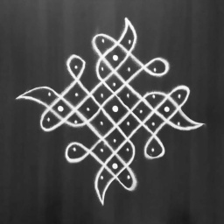

In [39]:
import numpy as np
from PIL import Image
from IPython.display import display

# --- CONFIG ---
file_path = r"dataset/processed/p_kambi/k_final.npy"   # path to your saved matrix
row_index = 29                       # <-- choose which row/image to view
grayscale = True                      # False if RGB images were saved
size      = (224, 224)                # must match the size used when saving

# --- Load matrix ---
image_matrix = np.load(file_path)
print("Matrix shape:", image_matrix.shape)

# --- Check index is valid ---
if row_index < 0 or row_index >= image_matrix.shape[0]:
    raise IndexError("row_index out of range")

# --- Extract and reshape the chosen row ---
flat_row = image_matrix[row_index]

if grayscale:
    img_matrix = flat_row.reshape(size)
    img = Image.fromarray(img_matrix.astype(np.uint8), mode='L')
else:
    img_matrix = flat_row.reshape((size[1], size[0], 3))
    img = Image.fromarray(img_matrix.astype(np.uint8), mode='RGB')

# --- Display the image ---
print(f"Displaying row {row_index}")
display(img)


In [40]:
"""import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- Load image ----------
img_path = "dataset/processed/p_pulli/im_p/kol_p_17.jpg"     # <- change to your file
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---------- 1. Create a rough foreground mask ----------
# Convert to grayscale and make a light threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold with Otsu to get subject vs. background
_, mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Optional: soften edges of mask
mask = cv2.GaussianBlur(mask, (15, 15), 0)

# ---------- 2. Blur the whole image ----------
background_blur = cv2.GaussianBlur(img_rgb, (25, 25), 0)

# ---------- 3. Combine: subject stays sharp, background blurred ----------
mask_3c = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) / 255.0  # normalize to 0–1
result = (img_rgb * mask_3c + background_blur * (1 - mask_3c)).astype(np.uint8)

# ---------- Display ----------
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.title("Original"); plt.imshow(img_rgb); plt.axis("off")
plt.subplot(1,3,2); plt.title("Mask"); plt.imshow(mask, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title("Background softened"); plt.imshow(result); plt.axis("off")
plt.show()

# Optional save
cv2.imwrite("background_blurred.jpg", cv2.cvtColor(result, cv2.COLOR_RGB2BGR))"""


'import cv2\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# ---------- Load image ----------\nimg_path = "dataset/processed/p_pulli/im_p/kol_p_17.jpg"     # <- change to your file\nimg = cv2.imread(img_path)\nimg_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n\n# ---------- 1. Create a rough foreground mask ----------\n# Convert to grayscale and make a light threshold\ngray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\nblur = cv2.GaussianBlur(gray, (5, 5), 0)\n\n# Threshold with Otsu to get subject vs. background\n_, mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)\n\n# Optional: soften edges of mask\nmask = cv2.GaussianBlur(mask, (15, 15), 0)\n\n# ---------- 2. Blur the whole image ----------\nbackground_blur = cv2.GaussianBlur(img_rgb, (25, 25), 0)\n\n# ---------- 3. Combine: subject stays sharp, background blurred ----------\nmask_3c = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) / 255.0  # normalize to 0–1\nresult = (img_rgb * mask_3c + background_blur * (1 - mas